# Exercise 3: More tabular data wrangling

Skills:
* Looping
* Dictionary to map values
* Dealing with duplicates
* Make use of Markdown cells to write some narrative or commentary!

References:
* https://docs.calitp.org/data-infra/analytics_new_analysts/02-data-analysis-intermediate.html

In [1]:
import pandas as pd

In [2]:
FOLDER = "./data/"
FILE_NAME = "exercise_2_3_ntd_metrics_2019.parquet"
df = pd.read_parquet(f"{FOLDER}{FILE_NAME}")
df.head(2)

,Agency,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?,Unnamed: 39,Unnamed: 40,Unnamed: 41,1,Unnamed: 43,Unnamed: 44
0,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,885",HR,...,None,"354,616,371",None,No,NaN,NaN,NaN,Hide questionable data tags,NaN,NaN
1,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,885",CB,...,None,"9,866,807",None,No,NaN,NaN,NaN,Show questionable data tags,NaN,NaN


In [ ]:
GCS_FILE_PATH = "gs://calitp-analytics-data/data-analyses/bus_service_increase/"
FILE_NAME = "ntd_metrics_2019.csv"

df = pd.read_csv(f"{GCS_FILE_PATH}{FILE_NAME}")
df.head(2)

In [3]:
#Keep a subset of columns and clean up column names (no spaces, newlines, etc)
df.columns = df.columns.str.replace('\n', ' ').str.replace(' ', '_')
df.head(2)

,Agency,City,State,Legacy_NTD_ID,NTD_ID,Organization_Type,Reporter_Type,Primary_UZA__Population,Agency_VOMS,Mode,...,Passenger_Miles_Questionable,Vehicle_Revenue_Miles,Vehicle_Revenue_Miles_Questionable,Any_data_questionable?,Unnamed:_39,Unnamed:_40,Unnamed:_41,1,Unnamed:_43,Unnamed:_44
0,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,885",HR,...,None,"354,616,371",None,No,NaN,NaN,NaN,Hide questionable data tags,NaN,NaN
1,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,885",CB,...,None,"9,866,807",None,No,NaN,NaN,NaN,Show questionable data tags,NaN,NaN


In [4]:
print(f"# obs: {len(df)}")
print(f"# unique IDs: {df.NTD_ID.nunique()}")

# obs: 3685
# unique IDs: 2183


In [5]:
df.NTD_ID.value_counts()

10003         9
60008         8
20080         8
30034         8
80001         8
             ..
55270         1
5R01-50364    1
90277         1
8R01-80159    1
2R02-20964    1
Name: NTD_ID, Length: 2183, dtype: int64

In [6]:
# Pick an example -- see that agency provides service for different modes
# df.NTD_ID.value_counts()
df[df.NTD_ID=="10003"].Mode.value_counts()

MB    2
FB    1
DR    1
CR    1
RB    1
HR    1
TB    1
LR    1
Name: Mode, dtype: int64

In [7]:
#what modes does it have
df.Mode.value_counts()

DR    1879
MB    1244
CB     177
VP     112
DT     103
FB      40
CR      27
LR      23
SR      22
HR      15
RB      13
YR       6
MG       6
TB       5
IP       3
TR       2
PB       1
CC       1
AR       1
Name: Mode, dtype: int64

In [8]:
list(df.columns)

['Agency',
 'City',
 'State',
 'Legacy_NTD_ID',
 'NTD_ID',
 'Organization_Type',
 'Reporter_Type',
 'Primary_UZA__Population',
 'Agency_VOMS',
 'Mode',
 'TOS',
 'Mode_VOMS',
 'Ratios:',
 'Fare_Revenues_per_Unlinked_Passenger_Trip_',
 'Fare_Revenues_per_Unlinked_Passenger_Trip_Questionable',
 'Fare_Revenues_per_Total_Operating_Expense_(Recovery_Ratio)',
 'Fare_Revenues_per_Total_Operating_Expense_(Recovery_Ratio)_Questionable',
 'Cost_per__Hour',
 'Cost_per_Hour_Questionable',
 'Passengers_per_Hour',
 'Passengers_per_Hour_Questionable',
 'Cost_per_Passenger',
 'Cost_per_Passenger_Questionable',
 'Cost_per_Passenger_Mile',
 'Cost_per_Passenger_Mile_Questionable',
 'Source_Data:',
 'Fare_Revenues_Earned',
 'Fare_Revenues_Earned_Questionable',
 'Total_Operating_Expenses',
 'Total_Operating_Expenses_Questionable',
 'Unlinked_Passenger_Trips',
 'Unlinked_Passenger_Trips_Questionable',
 'Vehicle_Revenue_Hours',
 'Vehicle_Revenue_Hours_Questionable',
 'Passenger_Miles',
 'Passenger_Miles_Quest

In [16]:
list(df1.columns)

['Agency',
 'City',
 'State',
 'NTD_ID',
 'Primary_UZA__Population',
 'Mode',
 'Fare_Revenues_Earned',
 'Fare_Revenues_per_Unlinked_Passenger_Trip_',
 'Total_Operating_Expenses',
 'Cost_per_Passenger',
 'Vehicle_Revenue_Miles']

In [9]:
#keep columns
keep_col=['Agency','City','State','NTD_ID','Primary_UZA__Population','Mode','Fare_Revenues_Earned','Fare_Revenues_per_Unlinked_Passenger_Trip_','Total_Operating_Expenses','Cost_per_Passenger','Vehicle_Revenue_Miles']

In [10]:
df1=df[keep_col]

### Dealing with Duplicates

* Explore why there are duplicates
* What's the analysis about? What should the unit of analysis be?
* Should duplicates be dropped? Should duplicates be aggregated into 1 entry?
* Hint: It depends on the analysis, and there might be a bit of both. Sometimes, aggregation makes sense. Duplicates require further investigation -- why do they appear in the dataset multiple times? Unless it's completely duplicate information, it doesn't make sense to just drop. It may show that the analysis can be more disaggregate than previously thought.

In [11]:
# But what about this case?
df[(df.Agency.str.contains("Los Angeles County Metropolitan Transportation Authority ")) 
   & (df.Agency.notna())].Mode.value_counts()

MB    2
HR    1
RB    1
LR    1
VP    1
Name: Mode, dtype: int64

In [12]:
# Find the column that has different values
df[(df.Agency.str.contains("Los Angeles County Metropolitan Transportation Authority ")) 
   & (df.Agency.notna()) & 
   (df.Mode=="MB")
  ]
#has different Vehicle_Revenue_Miles, so I would not drop duplicate 

,Agency,City,State,Legacy_NTD_ID,NTD_ID,Organization_Type,Reporter_Type,Primary_UZA__Population,Agency_VOMS,Mode,...,Passenger_Miles_Questionable,Vehicle_Revenue_Miles,Vehicle_Revenue_Miles_Questionable,Any_data_questionable?,Unnamed:_39,Unnamed:_40,Unnamed:_41,1,Unnamed:_43,Unnamed:_44
16,Los Angeles County Metropolitan Transportation...,Los Angeles,CA,9154,90154,Independent Public Agency or Authority of Tran...,Full Reporter,"12,150,996","3,469",MB,...,None,"65,595,822",None,No,NaN,NaN,NaN,None,NaN,NaN
17,Los Angeles County Metropolitan Transportation...,Los Angeles,CA,9154,90154,Independent Public Agency or Authority of Tran...,Full Reporter,"12,150,996","3,469",MB,...,None,"5,775,759",None,No,NaN,NaN,NaN,None,NaN,NaN


In [13]:
#Aggregate at least 2 ways and show an interesting comparison, after dealing with 
#duplicates somehow (either aggregation and/or defining what the unit of analysis is)
subset_cols = [
    'Agency', 'City', 'State', 'Legacy_NTD_ID', 'NTD_ID',
    'Organization_Type', 'Reporter_Type', 'Mode'
]

print(f"# obs: {len(df)}")
print(f"# obs after dropping dups: {len(df.drop_duplicates(subset=subset_cols))}")

# What does this indicate? Use Markdown cell and jot down some of the logic.

# obs: 3685
# obs after dropping dups: 3553


Keep a subset of columns. Drop duplicates. Compare how long the data is before and after dropping the duplicates. 3685-3553=132 duplicates

[Markdown reference](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook)

In [14]:
df2=df[subset_cols]

In [15]:
df1[['Cost_per_Passenger']].head()

,Cost_per_Passenger
0,$1.92
1,$21.13
2,$3.88
3,$106.96
4,$3.36


In [17]:
for c in ['Cost_per_Passenger', 'Total_Operating_Expenses', 'Primary_UZA__Population']:
    df1[c] = df1[c].str.replace('$', '').str.replace(',', '').fillna('0').astype({c: float})

/tmp/ipykernel_89/3202734568.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1[c] = df1[c].str.replace('$', '').str.replace(',', '').fillna('0').astype({c: float})
/tmp/ipykernel_89/3202734568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[c] = df1[c].str.replace('$', '').str.replace(',', '').fillna('0').astype({c: float})


In [ ]:
#df.Cost_per_Passenger=df.Cost_per_Passenger.astype('float')

In [ ]:
#ignore. practice only
df1 = (df1
    .assign(
        population = (df1['Cost_per_Passenger'].str.strip()
                .str.replace(',', '')
                     .str.replace('$', ''))
        ).astype({
        'cpp': float
        })
    )

In [18]:
df3=df1.drop_duplicates(subset=keep_col)

In [19]:
#For an agency with multiple modes, aggregate it across modes and get the sum for the service metrics.
df1.groupby(['Agency']).agg({'Cost_per_Passenger':'sum'}).reset_index()

,Agency,Cost_per_Passenger
0,City of Gadsden,21.05
1,Sistersville Ferry,12.93
2,10-15 Regional Transit Agency,13.71
3,A&C Bus Corporation & Montgomery & Westside Ow...,1.36
4,ALTRAN Transit Authority,8.54
...,...,...
2164,Yuba-Sutter Transit Authority,45.34
2165,Yuma County Intergovernmental Public Transport...,41.64
2166,Yurok Tribe,190.37
2167,"Zia Therapy Center, Inc.",27.23


In [21]:
#Calculate weighted average after the aggregation for the service metrics
#sum of cost and sum of passengers. then divide
cost=df1.groupby(['Agency']).agg({'Total_Operating_Expenses':'sum'}).reset_index()
passenger=df1.groupby(['Agency']).agg({'Primary_UZA__Population':'sum'}).reset_index()

In [26]:
cost

,Agency,Total_Operating_Expenses
0,City of Gadsden,937473.0
1,Sistersville Ferry,47877.0
2,10-15 Regional Transit Agency,2903338.0
3,A&C Bus Corporation & Montgomery & Westside Ow...,5498147.0
4,ALTRAN Transit Authority,839614.0
...,...,...
2164,Yuba-Sutter Transit Authority,7301375.0
2165,Yuma County Intergovernmental Public Transport...,4994351.0
2166,Yurok Tribe,536324.0
2167,"Zia Therapy Center, Inc.",1205068.0


In [29]:
cost.Total_Operating_Expenses/passenger.Primary_UZA__Population

0        7.304377
1             inf
2             inf
3        0.299605
4             inf
          ...    
2164    20.851718
2165    12.307390
2166          inf
2167     4.685334
2168          inf
Length: 2169, dtype: float64

### Changing values by using a dictionary to map

In [30]:
# Transit mode uses a code, 
# Use a dictionary to map those codes to its full name
MODE_NAMES = {
    'MB': 'Bus', 
    'LR': 'Light Rail',
    'CB': 'Commuter Bus',
}

# What happens to the ones that aren't specified in MODE_NAMES?
df = df.assign(
    mode_full_name = df.Mode.map(MODE_NAMES)
)

In [31]:
df.mode_full_name.value_counts()

Bus             1244
Commuter Bus     177
Light Rail        23
Name: mode_full_name, dtype: int64

In [32]:
df[df.mode_full_name.isna()].Mode.value_counts()

DR    1879
VP     112
DT     103
FB      40
CR      27
SR      22
HR      15
RB      13
YR       6
MG       6
TB       5
IP       3
TR       2
PB       1
CC       1
AR       1
Name: Mode, dtype: int64

In [ ]:
# Map values from Mode to rail, bus, and other 

### Looping

Can loop across columns or loop across subsets of data.

Sometimes, looping can make sense if you're repeating certain steps. Use it if it makes sense.

In [33]:
for c in ["Agency_VOMS", "Mode_VOMS"]:
    df[c] = df[c].str.replace(',', '').fillna('0').astype({c: int})

In [34]:
for s in ["CA", "ID"]:
    subset_df = df[df.State==s]
    display(subset_df[["Agency", "City"]].drop_duplicates().head())

,Agency,City
13,Los Angeles County Metropolitan Transportation...,Los Angeles
72,Orange County Transportation Authority,Orange
94,Access Services,El Monte
120,"City and County of San Francisco, dba: San Fra...",San Francisco
131,San Diego Metropolitan Transit System,San Diego


,Agency,City
703,"Ada County Highway District, dba: ACHD Commute...",Boise
778,Valley Regional Transit,Meridian
1440,"City of Pocatello, dba: Pocatello Regional Tra...",Pocatello
1482,Mountain Rides Transportation Authority,Ketchum
1598,Treasure Valley Transit,Nampa


### To Do:
* Keep a subset of columns and clean up column names (no spaces, newlines, etc):
    * columns related to identifying the agency
    * population, passenger trips
    * transit mode
    * at least 3 service metric variables, normalized and not normalized
* Deal with duplicates - what is the unit for each row? What is the unit for desired analysis? Should an agency appear multiple times, and if so, why?
* Aggregate at least 2 ways and show an interesting comparison, after dealing with duplicates somehow (either aggregation and/or defining what the unit of analysis is)
* Calculate weighted average after the aggregation for the service metrics. take the sum first, then divide by units
* Decide on one type of chart to visualize, and generalize it as a function
* Make charts using the function

### Helpful Hints for Functions
* Opportunities are from components that are generalizable in making a chart
* Maybe these components need the same lines of code to clean them
* You can always further define variables within a function
* You can always use f-strings within functions to make slight modifications to the parameters you pass

In [35]:
df.Agency.value_counts()

Massachusetts Bay Transportation Authority                           9
New Jersey Transit Corporation                                       8
King County Department of Metro Transit, dba: King County Metro      8
Metropolitan Transit Authority of Harris County, Texas               8
Maryland Transit Administration                                      8
                                                                    ..
City of Shafter                                                      1
Class LTD                                                            1
City of Onalaska, dba: Onalaska Shared Ride Taxi City of Onalaska    1
City of Monrovia                                                     1
City of Needles, dba: Needles Area Transit                           1
Name: Agency, Length: 2169, dtype: int64

In [36]:
keep_me = ['New Jersey Transit Corporation', 'Massachusetts Bay Transportation Authority', 'City of Shafter', 'Class LTD', 'City of Monrovia']
df4 = df1[df1.Agency.isin(keep_me)]

In [ ]:
# Sample function
import altair as alt

def make_bar_chart(df, x_col, y_col):
    x_title = f"{x_col.title()}"
    
    chart = (alt.Chart(df)
             .mark_bar()
             .encode(
                 x=alt.X(x_col, title=x_title),
                 y=alt.Y(y_col, title=""),
             )
            )
    return chart


In [ ]:
#create a bar chart
def make_bar_chart(df3, Mode, Cost_per_Passenger):
    x_title = f"{Mode.title()}"
    
    chart = (alt.Chart(df)
             .mark_bar()
             .encode(
                 x=alt.X(Mode, title=x_title),
                 y=alt.Y(Cost_per_Passenger, title=""),
             )
            )
    return chart

<AxesSubplot:xlabel='Agency'>

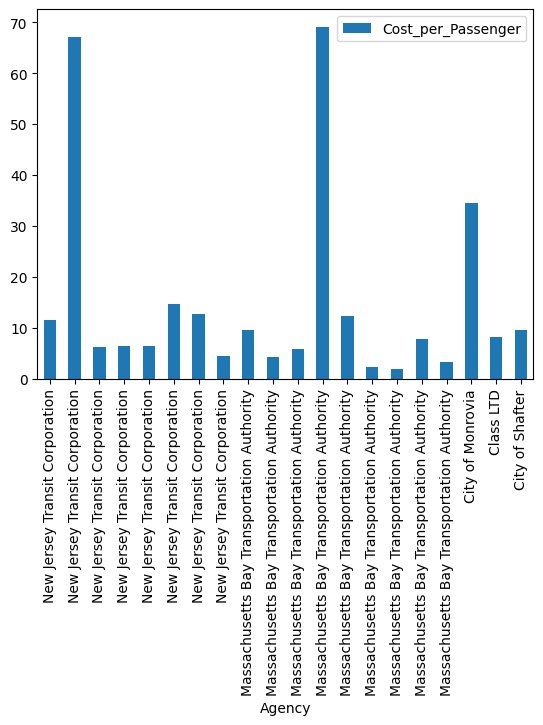

In [38]:
df4.plot(x='Agency', y='Cost_per_Passenger', kind='bar')
#how to have it appear together on a single bar???

In [ ]:
#print chart
#chart = make_bar_chart(df, "x_col", "y_col")
#chart

In [ ]:
#make_bar_chart(df3, Mode, Cost_per_Passenger)